In [60]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')  # 过滤警告（防止版本不匹配引起）

### 线性回归方程

In [61]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)  # 加上一些随机的抖动

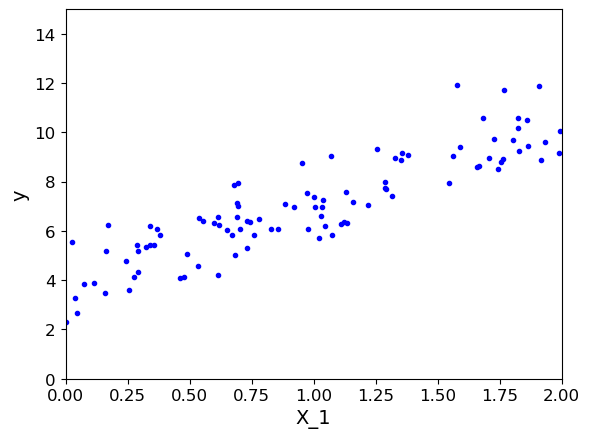

In [62]:
plt.plot(X,y,'b.')  # The color is 'blue', the shape is 'dot'
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])  # The range of axis
plt.show()

In [63]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [64]:
print(theta_best)

[[3.87211662]
 [3.2432578 ]]


In [65]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.87211662]
 [10.35863223]]


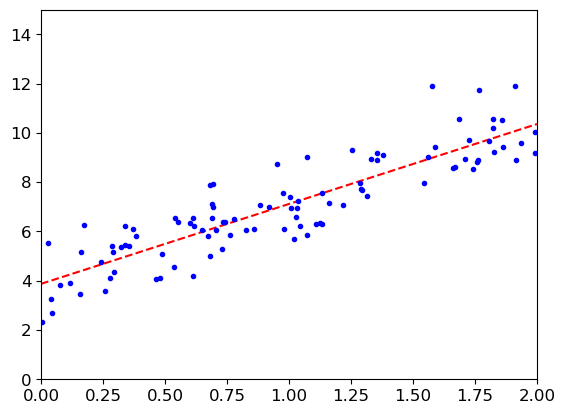

In [66]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X,y,'b.')
plt.axis([0, 2, 0, 15])
plt.show()

### 用sklearn线性回归（看sklearn api文档）

In [67]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[3.2432578]]
[3.87211662]


## 梯度下降
注意对数据进行预处理，比如标准化

### 批量梯度下降

In [68]:
eta = 0.1  # 学习率
n_iterations = 1000  # 迭代次数
m = 100  # 样本个数
theta = np.random.rand(2,1)  # 随机初始化
for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(f'theta:\n{theta}\n')
print(f'X_new_b.dot(theta):\n{X_new_b.dot(theta)}')

theta:
[[3.87211662]
 [3.2432578 ]]

X_new_b.dot(theta):
[[ 3.87211662]
 [10.35863223]]


In [69]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):  # 不同的学习率对结果的影响
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'r-')
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0, 2, 0, 15])
    plt.title('eta = {}'.format(eta))

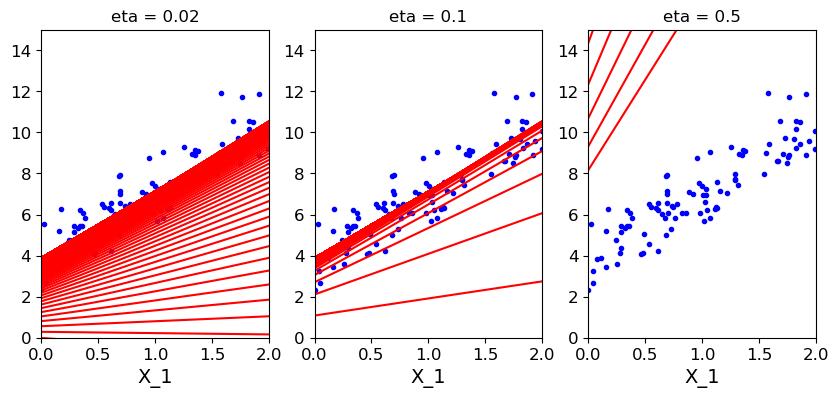

In [70]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plot_gradient_descent(theta, eta=0.02)
plt.subplot(1, 3, 2)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(1, 3, 3)
plot_gradient_descent(theta, eta=0.5)
plt.show()

### 随机梯度下降

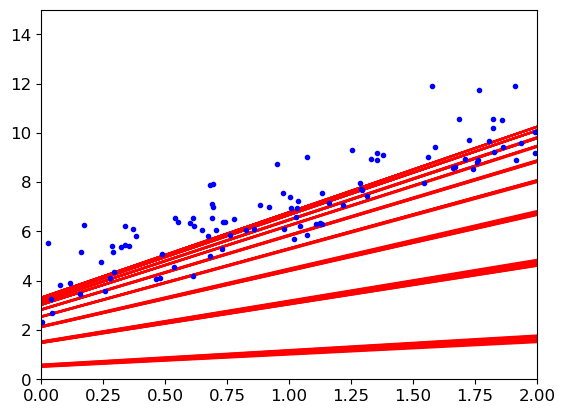

In [71]:
theta = np.random.randn(2,1)
theta_path_sgd = []
m = len(X_b)
n_epochs = 50

# 梯度下降的策略：学习率先大后小
t = 0
t0 = 5
t1 = 50
def learing_schedule(t):
    return t0 / (t1 + t)  # 随着t增大，学习率减小

for epoch in range(n_epochs):
    for i in range(m):  # 遍历每一个样本
        if epoch < 10 and i < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learing_schedule(n_epochs * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## MiniBatch梯度下降

In [72]:
theta = np.random.rand(2,1)
theta_path_mgd = []
n_epochs = 50
minibatch = 8
# np.random.seed(42)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)  # 洗牌操作
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch):
        t += 1
        xi = X_b_shuffled[i : i + minibatch]
        yi = y_shuffled[i : i + minibatch]
        gradients = 2/minibatch * xi.T.dot(xi.dot(theta) - yi)
        eta = learing_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
print(theta)

[[3.86224925]
 [3.25206366]]


## 3种策略的对比试验

In [73]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

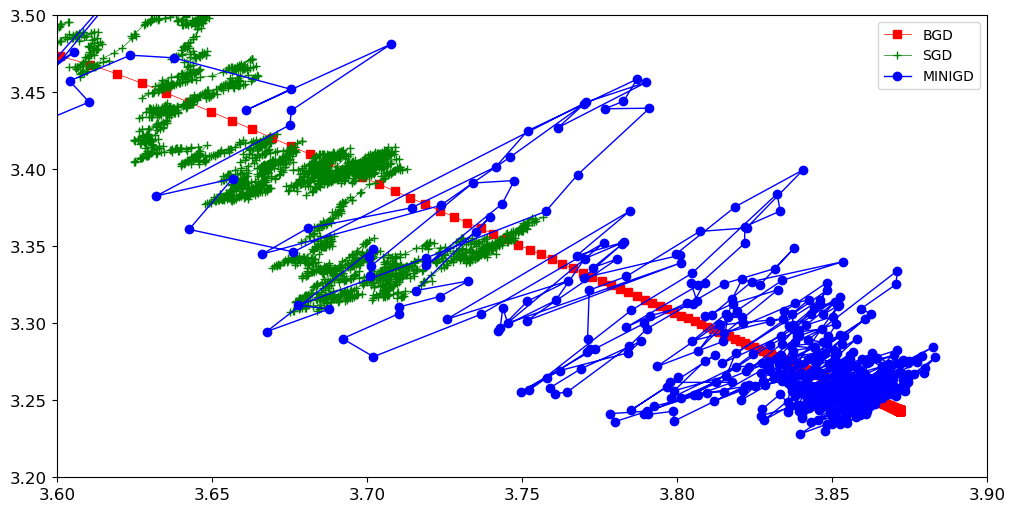

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'r-s', linewidth=0.5, label='BGD')
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'g-+', linewidth=0.5, label='SGD')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'b-o', linewidth=1, label='MINIGD')
plt.legend(loc = 'upper right')
plt.axis([3.6, 3.9, 3.2, 3.5])
plt.show()
